# Partial Dependence Plot (PDP) Demonstration

This notebook demonstrates how to compute and interpret PDPs using scikit-learn. PDPs help visualize the effect of several input features on the predicted outcome of a trained machine learning model. 

We'll use the California Housing dataset and a Random Forest Regressor model for the regression. 

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

## Load and Explore the Dataset

In [2]:
housing = fetch_california_housing(as_frame = True)
X = housing.data
y = housing.target

# preview data
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# basic info
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Train a Random Forest Regressor

In [4]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# train model
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

# evaluate model
print(f"Train R²: {model.score(X_train, y_train):.2f}")
print(f"Test R²: {model.score(X_test, y_test):.2f}")

Train R²: 0.97
Test R²: 0.81


## Plot a PDP for a single feature

For the single feature of interest, we'll use the median income `MedInc`

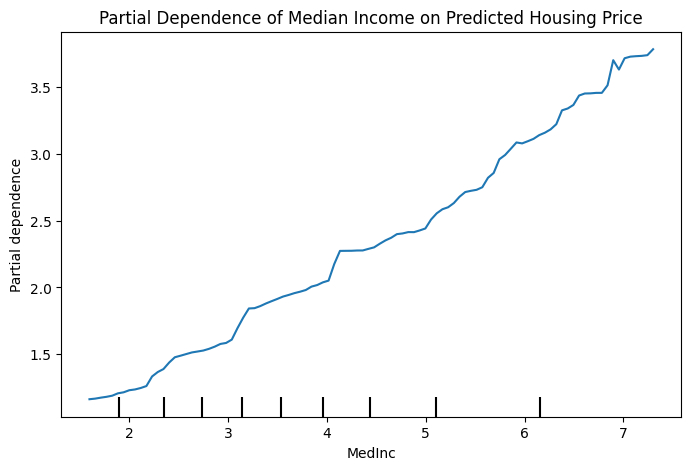

In [8]:
feature = ['MedInc']

fig, ax = plt.subplots(figsize=(8,5))
PartialDependenceDisplay.from_estimator(model, X, features=feature, ax=ax)
plt.title("Partial Dependence of Median Income on Predicted Housing Price")
plt.show()

## Interpretation

The above plot depicts a fairly strong positive relationship between median income and predicted housing prices, indicating that areas of high median income will have high housing prices, and vice versa (lower MedInc -> lower housing prices). 

## Plot PDP for a Feature Interaction (2D PDP)

<Figure size 800x600 with 0 Axes>

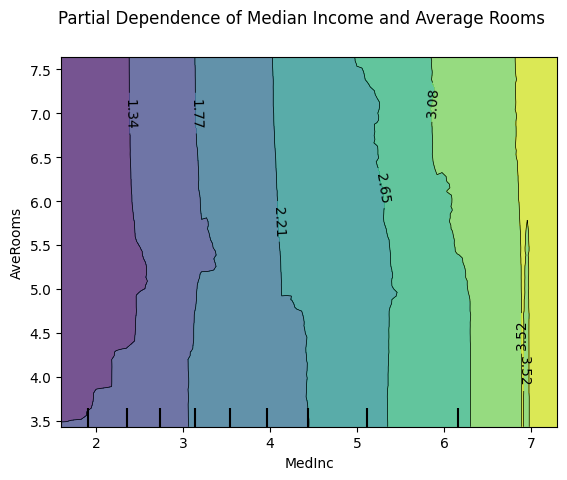

In [13]:
# interaction: 'MedInc' and 'AveRooms'
features = [('MedInc', 'AveRooms')]

fig = plt.figure(figsize = (8,6))
PartialDependenceDisplay.from_estimator(model, X, features=features)
plt.suptitle("Partial Dependence of Median Income and Average Rooms")
plt.show()

## Interpretation

### Color shading and contour

The color gradient represents the model's predicted housing prices.
 - darker purple = lower predicted prices
 - brighter yellow-green = higher predicted prices

The contour lines and labels show approximate predicted values (e.g., 1.34, 2.21) helping to track how predictions change across the features space.

### Interpretation
1. Median Income (abscissa / x-axis):
   - The plot shows that as **median income** increases, the prediced housing price **consistently rises**, regardless of the number of rooms.
   - This trend indicates a strong positive relationship between income and price in the model's predictions.
2. Average rooms (ordinal / y-axis):
   - Changes in **average rooms** have a **weaker and more nuanced effect**.
   - For lower median income values (left side), changes in average rooms slightly **raises predictions**, but the effect is small
   - At high median income values (right side), changes in average rooms seem to matter less, as the prices are already high
3. Interaction:
   - There doesn't seem to be a strong interaction between the two variables - most of the contour lines are fairly vertical, showing that **median income is the dominant driver of pricing trends**
   - That said, there are some regions of nonlinearity: the small regions near high MedInc and low AveRooms seem to produce relatively sharp price increases.